# A Steam catalog analysis 

Course project for [Data Analysis with Python: Zero to Pandas](zerotopandas.com)

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


Let us save and upload our work to Jovian before continuing.

In [67]:
project_name = "zerotopandas-course-project-steam-catalog-analysis" # change this (use lowercase letters and hyphens only)

In [68]:
!pip install jovian --upgrade -q

In [69]:
import jovian

In [70]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "carloscuepuente/zerotopandas-course-project-steam-catalog-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/carloscuepuente/zerotopandas-course-project-steam-catalog-analysis


'https://jovian.ai/carloscuepuente/zerotopandas-course-project-steam-catalog-analysis'

## Data Preparation and Cleaning

 The original data set is in this url https://www.kaggle.com/nikdavis/steam-store-games?select=steam.csv



First let's import the libraries that we will use for this project

In [71]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Reading the csv file

In [72]:
data_raw = pd.read_csv("./steam.csv")

## Important description about the data
   * appid: Unique identifier for each title/game
   * name: Title of app (game)
   * release_date: Release date in format YYYY-MM-DD
   * english: Language support: 1 if is in English
   * developer: Name (or names) of developer(s). Semicolon delimited if multipl
   * publisher: Name (or names) of publisher(s). Semicolon delimited if multiple
   * platforms: Semicolon delimited list of supported platforms. At most includes: windows;mac;linux
   * required_age: Minimum required age according to PEGI UK standards. Many with 0 are unrated or unsupplied
   * categories: Semicolon delimited list of game categories, e.g. single-player;multi-player
   * genres: Semicolon delimited list of game genres, e.g. action;adventure
   * steamspy_tags: Semicolon delimited list of top steamspy game tags, similar to genres but community voted
   * achievements: Number of in-games achievements, if any
   * positive_ratings: Number of positive ratings, from SteamSpy
   * negative_ratings: Number of negative ratings, from SteamSpy
   * average_playtime: Average user playtime, from SteamSpy
   * median_playtime: Median user playtime, from SteamSpy
   * owners: Estimated number of owners. Contains lower and upper bound (like 20000-50000). May wish to take mid-point or lower
   * price: Current full price of title in GBP, (pounds sterling)

In [73]:
data_raw.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


The code `df.info()` give us important information about the dataframe `df` that we are going to be using in this project.
It appears that the `df`has 27075 rows and 18 columns, and no non null values

In [74]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

After readding the `df`it is only recognicing 9 out of 18 columns as numerical values.

In [75]:
data_raw.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


The appid is a unique value for each tittle of the steam catalog, lets place it as the index for the `df`

In [76]:
data_raw.set_index("appid",inplace=True)

The platforms column is an interesting one to work with, lets see how many unique platforms are in this dataset

In [77]:
data_raw.platforms.unique()

array(['windows;mac;linux', 'windows;mac', 'windows', 'windows;linux',
       'mac', 'mac;linux', 'linux'], dtype=object)

There are 7 unique entries in the platforms column, they are **;** separated. Since they are easy to read and offer sufficient information we can safely use them as a categorical column

### The categories column
This column is a tricky one, lets see how it looks, how many unique entries are, etc

In [78]:
len(data_raw.categories.unique().tolist())

3333

There are **3333** unique entries in the categorie column, now lets take a sample out of them to explore a little bit more

In [79]:
data_raw["categories"].sample(10)

appid
739170                     Single-player;Steam Achievements
869870         Single-player;Steam Achievements;Steam Cloud
665090    Single-player;Steam Achievements;Full controll...
332730    Multi-player;Steam Achievements;Steam Trading ...
617060    Single-player;Steam Achievements;Steam Leaderb...
539700    Single-player;Steam Achievements;Full controll...
959520                            Single-player;Steam Cloud
711990        Single-player;Steam Trading Cards;Steam Cloud
230150                                        Single-player
860890                            Single-player;Steam Cloud
Name: categories, dtype: object

We can see from the random sample, that in the categorie column, all the values are semicolon separeted, and have valuable information about, how many player can play the game, and also other feactures about some games, for instance, if it have controller support or virtual reality etc. In my case i´m more interested in find out about single and multiplayer games.

So my aim is to transform this column to reflect that. And categorize the steam catalog only in terms of how many player the game soports. For this i´m going to create a function to do that, and apply it to every element in the column

But first i have to narrow down the search, to a couple of well know types of games in the video game industry

In [80]:
main_categories = data_raw.categories
main_categories = pd.DataFrame(main_categories.str.findall("Multi-player|Single-player|MMO|Online Multi-Player|Online Co-op|Multi|Shared/Split Screen"))

The method `str.findall` of the most common categories, returns a list with the coinicidences on the categories column of our dataframe. Lets take a look of the result

In [81]:
main_categories

,categories
appid,
10,"[Multi-player, Online Multi-Player, Multi]"
20,"[Multi-player, Online Multi-Player, Multi]"
30,[Multi-player]
40,"[Multi-player, Online Multi-Player, Multi]"
50,"[Single-player, Multi-player]"
...,...
1065230,[Single-player]
1065570,[Single-player]
1065650,"[Single-player, Multi-player, Shared/Split Scr..."


Now we already know what the input information for our funtion. The logic behind it is very simple, everything that can be played by one or more people is going to be categoriced as "Single & Multi-player". Everything else is going to be ether pure single player or pure multiplayer. And as a willd card a No categorie, for the entries that doesnt fall in neither categorie.

In [82]:
def clasificador2(lista):
    string =""
    for i in lista:
         string += i
    if "multi" in string.lower() and "single" in string.lower():
        return "Single & Multi-player"
    elif "single" in string.lower() and "mmo" in string.lower():
        return "Single & Multi-player"
    elif "single" in string.lower() and "co-op" in string.lower():
        return "Single & Multi-player"
    elif "single" in string.lower() and "shared" in string.lower():
        return "Single & Multi-player"
    elif "single" in string.lower():
        return "Single-player"
    elif "multi" in string.lower():
        return "Multi-player"
    elif "mmo" in string.lower():
        return "Multi-player"
    elif "shared" in string.lower():
        return "Multi-player"
    else:
        return "No categorie"

In [83]:
main_categories = main_categories.applymap(clasificador2)
main_categories.head()

,categories
appid,
10,Multi-player
20,Multi-player
30,Multi-player
40,Multi-player
50,Single & Multi-player


In [84]:
data_raw["categories"] = main_categories.categories
data_raw.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
appid,,,,,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single & Multi-player,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [85]:
data_raw["categories"].describe()

count             27075
unique                4
top       Single-player
freq              20772
Name: categories, dtype: object

We end up with 4 unique categories

### The genre and steamspy_tags

For the genre of the games, the dataset has 2 columns that refeer to it. One native of steam, and another one called steamspy_tag, that is similar to the genre column but community voted, so lets take the most voted by the comunity as representation of the genre

In [86]:
data_raw.genres.describe()

count            27075
unique            1552
top       Action;Indie
freq              1852
Name: genres, dtype: object

In [87]:
data_raw.steamspy_tags.describe()

count                   27075
unique                   6423
top       Action;Indie;Casual
freq                      845
Name: steamspy_tags, dtype: object

We can see that as in other text entries, this one is also separeted by a semicolon, and whith the `.apply` method, is very easy, to perform an lambda function to split it by ; and take the first element.

In [88]:
data_raw["steamspy_tags"] = data_raw["steamspy_tags"].apply(lambda tag : tag.strip().split(";")[0])

### The date column

Let's parse the date column, as the `pd.read_csv()`, did not recognised as a date format

In [89]:
data_raw["release_date"] = data_raw["release_date"].astype("datetime64[ns]")
data_raw["release_year"] = pd.DatetimeIndex(data_raw.release_date).year
data_raw["release_month"] = pd.DatetimeIndex(data_raw.release_date).month

### The owners column

The description for this column in the information about the dataset, says "Estimated number of owners. Contains lower and upper bound (like 20000-50000). May wish to take mid-point or lower".

I took interest in this an visted the web site for the steam spy, and find out that the reason they estimate the owner like this is because, the way they keep track of this metric, when Steam launch a beta or a free game during a weekend the number of users changes. By the way you can check thir [web site](https://steamspy.com/)

So let´s take the mid point of the range.
 



In [90]:
data_raw.owners.describe()

count       27075
unique         13
top       0-20000
freq        18596
Name: owners, dtype: object

In [91]:
data_raw["midpoint_range_owners"] = data_raw["owners"].apply(
    lambda item : (int(item.strip().split("-")[0]) + int(item.strip().split("-")[1])) / 2)

### Dropping some of the unwanted columns

In [92]:
unwanted_cols = ["english","required_age","genres","owners"]

In [93]:
data_raw.drop(columns=unwanted_cols,inplace=True)
data_raw.head()

,name,release_date,developer,publisher,platforms,categories,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,release_year,release_month,midpoint_range_owners
appid,,,,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,Valve,Valve,windows;mac;linux,Multi-player,Action,0,124534,3339,17612,317,7.19,2000,11,15000000.0
20,Team Fortress Classic,1999-04-01,Valve,Valve,windows;mac;linux,Multi-player,Action,0,3318,633,277,62,3.99,1999,4,7500000.0
30,Day of Defeat,2003-05-01,Valve,Valve,windows;mac;linux,Multi-player,FPS,0,3416,398,187,34,3.99,2003,5,7500000.0
40,Deathmatch Classic,2001-06-01,Valve,Valve,windows;mac;linux,Multi-player,Action,0,1273,267,258,184,3.99,2001,6,7500000.0
50,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,windows;mac;linux,Single & Multi-player,FPS,0,5250,288,624,415,3.99,1999,11,7500000.0


In [94]:
data_raw.shape

(27075, 16)

After the processing the data set now has 27075 rows and 16 columns and we are ready to make some data visualization

In [95]:
import jovian

In [96]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "carloscuepuente/zerotopandas-course-project-steam-catalog-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/carloscuepuente/zerotopandas-course-project-steam-catalog-analysis


'https://jovian.ai/carloscuepuente/zerotopandas-course-project-steam-catalog-analysis'

## Exploratory Analysis and Visualization

## Heat map for the steam catalog game releases

To make a [heat map](https://en.wikipedia.org/wiki/Heat_map) of game releases on steam, we need to calculate the frequency of game releases by month and year. So we need to perform a groupby operation and count the game releases in those groups.

In [97]:
frequency = pd.DataFrame(data_raw.groupby(by=["release_year","release_month"]).count()["name"])
frequency.head()

name
release_year release_month      
1997         6                 1
1998         11                1
1999         4                 1
             11                1
2000         11                2

Then we can use the `df.unstack()` [method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html), to pivot the frequency dataframe

In [98]:
frequency = frequency.unstack()

In [99]:
frequency

name                                                          \
release_month     1      2      3      4      5      6      7      8      9    
release_year                                                                   
1997             NaN    NaN    NaN    NaN    NaN    1.0    NaN    NaN    NaN   
1998             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1999             NaN    NaN    NaN    1.0    NaN    NaN    NaN    NaN    NaN   
2000             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2001             NaN    NaN    1.0    NaN    NaN    2.0    NaN    NaN    NaN   
2002             NaN    NaN    NaN    NaN    NaN    NaN    NaN    1.0    NaN   
2003             NaN    NaN    NaN    NaN    1.0    NaN    1.0    NaN    NaN   
2004             NaN    NaN    2.0    NaN    NaN    1.0    NaN    NaN    NaN   
2005             NaN    NaN    NaN    1.0    NaN    NaN    2.0    1.0    NaN   
2006             NaN    2.0    1.0    1.0    3.0    1.0    6.0    4.0    5.0   
2007             1.0    2.0   23.0    3.0    5.0    6.0    7.0   29.0    3.0   
2008            12.0    4.0   10.0    7.0   13.0   17.0   14.0    7.0   16.0   
2009            11.0   17.0   20.0   15.0   21.0   29.0   48.0   33.0   24.0   
2010            12.0   25.0   19.0   30.0   14.0   17.0   26.0   13.0   21.0   
2011            13.0   12.0   20.0   17.0   23.0   23.0   17.0   28.0   28.0   
2012            16.0   23.0   25.0   25.0   29.0   22.0   13.0   35.0   34.0   
2013            14.0   22.0   26.0   29.0   28.0   26.0   18.0   33.0   39.0   
2014            63.0   98.0  109.0  152.0  198.0  114.0  161.0  113.0  119.0   
2015           161.0  181.0  169.0  212.0  245.0  187.0  254.0  252.0  258.0   
2016           206.0  235.0  321.0  370.0  289.0  321.0  356.0  438.0  432.0   
2017           364.0  444.0  463.0  397.0  425.0  385.0  556.0  654.0  688.0   
2018           543.0  673.0  787.0  697.0  765.0  615.0  707.0  692.0  703.0   
2019           558.0  587.0  587.0  480.0    1.0    NaN    NaN    NaN    NaN   

                                    
release_month     10     11     12  
release_year                        
1997             NaN    NaN    NaN  
1998             NaN    1.0    NaN  
1999             NaN    1.0    NaN  
2000             NaN    2.0    NaN  
2001             NaN    NaN    1.0  
2002             NaN    NaN    NaN  
2003             NaN    1.0    NaN  
2004             NaN    3.0    NaN  
2005             2.0    NaN    NaN  
2006            14.0    6.0    5.0  
2007             7.0    4.0    3.0  
2008            18.0   13.0   14.0  
2009            34.0   32.0   21.0  
2010            33.0   19.0    9.0  
2011            30.0   20.0    8.0  
2012            45.0   33.0   20.0  
2013            69.0   68.0   46.0  
2014           159.0  135.0  134.0  
2015           251.0  213.0  214.0  
2016           473.0  434.0  486.0  
2017           705.0  627.0  649.0  
2018           651.0  716.0  611.0  
2019             NaN    NaN    NaN

The resulting `frequency` dataframe now has the release month row as a column, and the method automatically assign a `Nan`value for the missing values. You can pass an optional `fill_value` keyword to fill this `Nan`values with custom value.

Another problem we have is that since the `frequency` dataframe has a `MultiIndex`, the columns of the dataframe are now tuples of values.

In [100]:
frequency.columns

MultiIndex([('name',  1),
            ('name',  2),
            ('name',  3),
            ('name',  4),
            ('name',  5),
            ('name',  6),
            ('name',  7),
            ('name',  8),
            ('name',  9),
            ('name', 10),
            ('name', 11),
            ('name', 12)],
           names=[None, 'release_month'])

We can use the `droplevel()` method to remove 1 level of the `MultiIndex` in the column axis

In [101]:
frequency=frequency.droplevel(0,axis=1)

In [102]:
frequency.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='release_month')

And finally using the `.heatmap()` method. The `cmap` option is for setting the color palette for the heatmap, I used the "coolwarm" palette, because it offers a self-explanatory contrast, but you can find a ton of other cool color palettes in the [seaborn documentation](https://seaborn.pydata.org/tutorial/color_palettes.html). The `linewidths` is for adding a separation for the color grid. For more info about the seaborn heatmap click [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

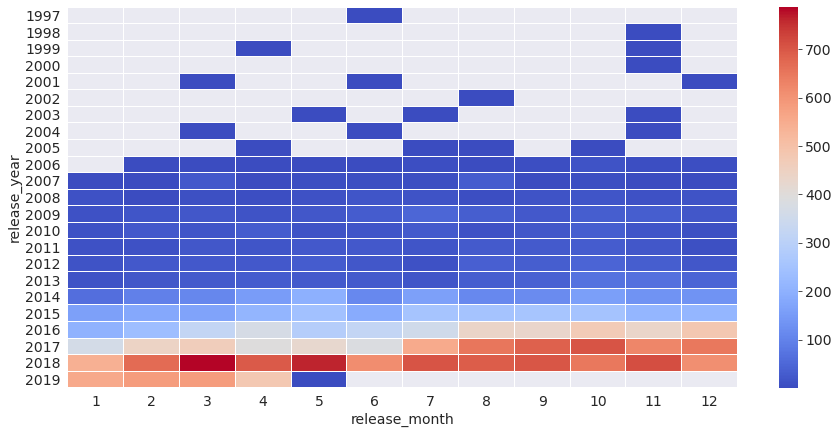

In [103]:
plt.figure(figsize = (15,7))
sns.heatmap(frequency,cmap="coolwarm",linewidths=.05);

Several insights can be drawn from this graphic:
* Steam started releasing games every month since february of 2006
* The release rate started to increase in 2014
* Of the entire time series, March 2018 was when the most games were released
* The data goes up to April 2019

### Games per categorie

Seaborn ofers a lot of options to work with [categorical data](https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial), and the [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) is one of them. This grafic show the counts of observations in each categorical bin using bars.

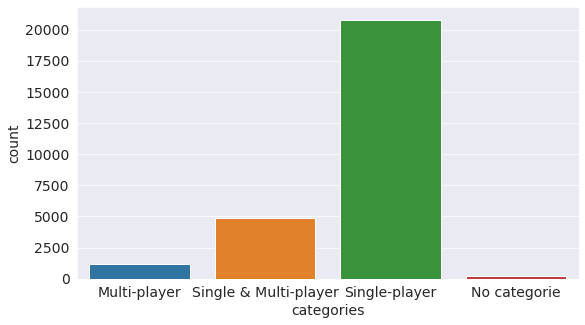

In [104]:
sns.countplot(x="categories", data = data_raw);

We can see by this graphic that it´s overwhelming the amount of single player games in the Steam catalog.

### Games by categorie by release year

Can it be that the release year has some relation to the amount of single player games, let´s assume that in the late 90 and 2000´s the internet was at its infancy and not so many multiplayer games were released

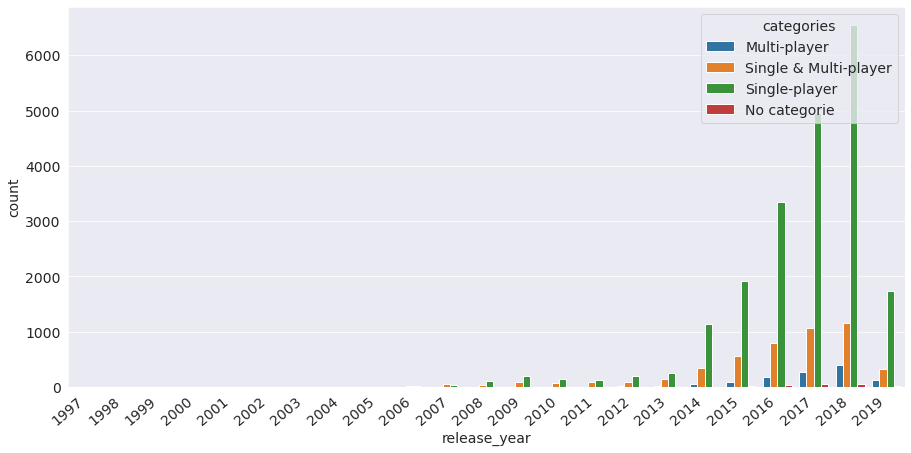

In [105]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x="release_year",hue = "categories", data = data_raw)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

It wasn’t a crazy supposition, but the graph speak by itself, most single player games, were released after 2015. But this graphic also show us that the rate of release of games with both single & multiplayer support, also increased, and the pure multiplayer games releases seams is also increasing

### Average playtime per categorie vs Owners per categorie vs games per categorie

Let´s take it a little further and compare the average playtime with how many owners and try to relate it and compare with the games per categorie in a single figure. Matplotlib provides a useful way to show different figures in one plot read more [here](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot) and [here](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot)

In [106]:
games_categorie = data_raw.groupby(data_raw.categories).count()["name"].copy()
games_categorie.sort_values(ascending = False, inplace = True)
games_categorie

categories
Single-player            20772
Single & Multi-player     4906
Multi-player              1205
No categorie               192
Name: name, dtype: int64

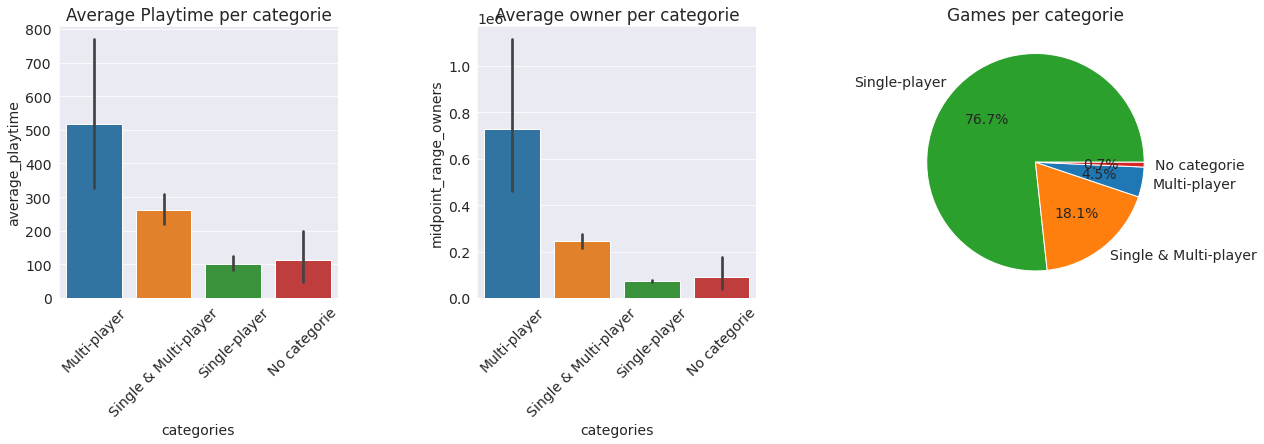

In [107]:
fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(wspace=0.5)

ax = fig.add_subplot(1, 3, 1)
sns.barplot(x= "categories", y = "average_playtime",data=data_raw,ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Average Playtime per categorie")

ax = fig.add_subplot(1, 3, 2)
sns.barplot(x= "categories", y = "midpoint_range_owners",data=data_raw,ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Average owner per categorie")

ax = fig.add_subplot(1, 3, 3)
plt.pie(games_categorie,labels=games_categorie.index.tolist(),autopct="%1.1f%%",colors=["tab:green",
                                                                                        "tab:orange",
                                                                                        "tab:blue",
                                                                                        "tab:red"])
ax.set_title("Games per categorie")
plt.show()

From a single plot we combine two [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot) and one [pie chart](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) to pick up several useful insights, even though that almost 80% of games in the steam catalog are pure single player, in average, multiplayer games have the most playtime register(even taking in to account the error show by the line in the bar plot), and they are owned by more people than games in other categories.

This can point to the fact that multiplayer games have what in the game industry is called re playability, and also that we as human beings are extremely social and we use games as a tool to socialize. A bold statement that needs to be studied more

### Categorie and OS

Let's take a look into how many titles were released for each of the operating system (OS) by categorie.

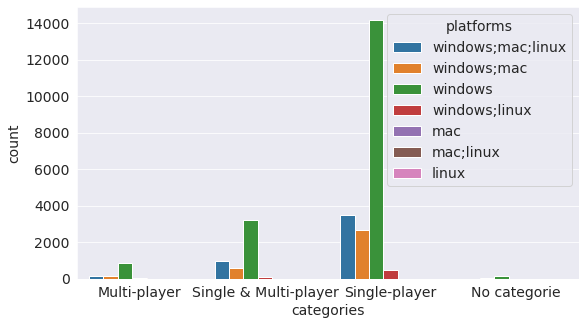

In [108]:
sns.countplot(x="categories",hue = "platforms", data = data_raw);

We can see that in every single category, most of the game are released for windows, and in second place, for all tree mayor OS (windows, mac and linux).

### Games Prices

a quick look into the prices

In [109]:
data_raw.price.describe()

count    27075.000000
mean         6.078193
std          7.874922
min          0.000000
25%          1.690000
50%          3.990000
75%          7.190000
max        421.990000
Name: price, dtype: float64

From the describe method, now we have a better grasp of the distribution for games prices (in GBP). The mean is 6.07 pounds, with a high standard deviation of 7.87 pounds.

Let´s take a look of the histogram for the 75% of the data using the matplotlib [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

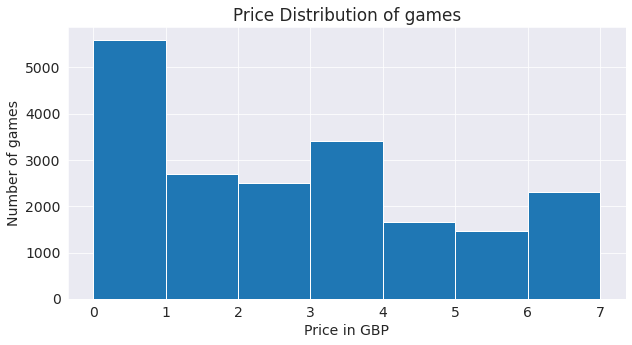

In [110]:
plt.figure(figsize=(10, 5))
plt.title("Price Distribution of games")
plt.xlabel("Price in GBP")
plt.ylabel("Number of games")

plt.hist(data_raw.price, bins=np.arange(data_raw.price.quantile(0.0),data_raw.price.quantile(0.75),1), color="tab:blue");

75% percent of the games are priced below 7 pounds, and a good chunk of them more than 5000 games, have a price lower than 1 pound.

Let us save and upload our work to Jovian before continuing

In [111]:
import jovian

In [112]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "carloscuepuente/zerotopandas-course-project-steam-catalog-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/carloscuepuente/zerotopandas-course-project-steam-catalog-analysis


'https://jovian.ai/carloscuepuente/zerotopandas-course-project-steam-catalog-analysis'

## Asking and Answering Questions

Now that we have a general understanding of the dataset, let's ask a few questions about it

#### Q1: Single out the games that have both high positive and negative ratings

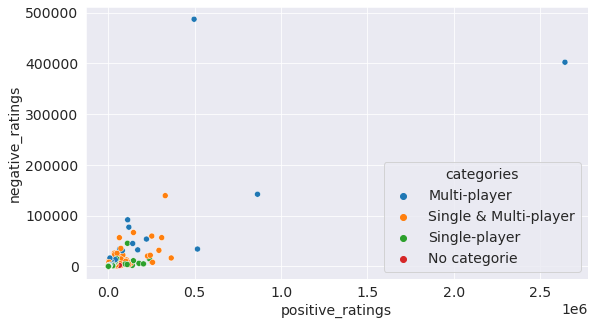

In [113]:
sns.scatterplot(x="positive_ratings", y="negative_ratings", hue="categories", data=data_raw)
plt.xlabel("positive_ratings")
plt.ylabel("negative_ratings");

In [114]:
love_hate_relationship = data_raw[(data_raw["positive_ratings"] > 0.4*1e6) & (data_raw["negative_ratings"] > 100_000)]
love_hate_relationship[["name","categories","positive_ratings","negative_ratings","midpoint_range_owners"]]

,name,categories,positive_ratings,negative_ratings,midpoint_range_owners
appid,,,,,
570,Dota 2,Multi-player,863507,142079,150000000.0
730,Counter-Strike: Global Offensive,Multi-player,2644404,402313,75000000.0
578080,PLAYERUNKNOWN'S BATTLEGROUNDS,Multi-player,496184,487076,75000000.0


Looks like these 3 multiplayer games either you love them or hate them...

#### Q2: Top 10 games with the highest and lowest positive ratings ratio with more than 500,000 owners

In [115]:
data_raw["positive_ratings_ratio"] = (data_raw["positive_ratings"] / (data_raw["positive_ratings"] + data_raw["negative_ratings"])) * 100

In [116]:
top_10 = data_raw[data_raw["midpoint_range_owners"]>500_000].sort_values(by="positive_ratings_ratio",ascending=False).head(10)
top_10[["name","categories","steamspy_tags","midpoint_range_owners","positive_ratings_ratio"]]

,name,categories,steamspy_tags,midpoint_range_owners,positive_ratings_ratio
appid,,,,,
620,Portal 2,Single-player,Puzzle,15000000.0,98.650356
427520,Factorio,Single & Multi-player,Early Access,1500000.0,98.513600
264200,One Finger Death Punch,Single-player,Action,750000.0,98.226778
424280,Iron Snout,Single-player,Free to Play,1500000.0,98.044614
341800,Keep Talking and Nobody Explodes,Multi-player,Co-op,750000.0,98.037543
400,Portal,Single-player,Puzzle,15000000.0,97.957679
294100,RimWorld,Single-player,Base-Building,1500000.0,97.825591
351640,Eternal Senia,Single-player,Anime,750000.0,97.803155
292030,The Witcher® 3: Wild Hunt,Single-player,Open World,7500000.0,97.690249


Seems like [The Witcher 3](https://store.steampowered.com/app/292030/The_Witcher_3_Wild_Hunt/?l=spanish), one of my favorite games, made it to the liderboard. And the only pure multiplayer game that made it was one that I never head of [Keep Talking and Nobody Explodes](https://store.steampowered.com/app/341800/Keep_Talking_and_Nobody_Explodes/), looks fun!

In [117]:
bottom_10 = data_raw[data_raw["midpoint_range_owners"]>500_000].sort_values(by="positive_ratings_ratio",ascending=True).head(10)
bottom_10[["name","categories","steamspy_tags","midpoint_range_owners","positive_ratings_ratio"]]

,name,categories,steamspy_tags,midpoint_range_owners,positive_ratings_ratio
appid,,,,,
822240,Animal Jam - Play Wild!,Multi-player,Early Access,750000.0,24.244221
730310,DYNASTY WARRIORS 9 真・三國無双８,Single & Multi-player,Action,1500000.0,24.349108
345920,The Note,Single-player,Indie,750000.0,26.524390
577800,NBA 2K18,Single & Multi-player,Sports,1500000.0,28.593408
47400,Stronghold 3 Gold,Single & Multi-player,Strategy,750000.0,28.933254
258180,Deus Ex: The Fall,Single-player,Cyberpunk,750000.0,32.028470
834910,ATLAS,Multi-player,Early Access,1500000.0,34.511609
32420,STAR WARS™: The Clone Wars - Republic Heroes™,Single & Multi-player,Action,750000.0,37.303371
335330,Brick-Force,Multi-player,Free to Play,750000.0,38.983051


[Animal Jam - Play Wild!](https://store.steampowered.com/app/822240/Animal_Jam/#app_reviews_hash) in mid-2019, was really poorly rated, but it seems that the developers took the feedback into account, because now it has some pretty good reviews

Speaking of developers, let's make a leaderboard for the most proficient publishers and developers in game releases.

#### Q3: Top 10 developers and publishers

In [118]:
top_developer = data_raw.developer.value_counts().head(10)

Text(0.5, 0, 'Games released')

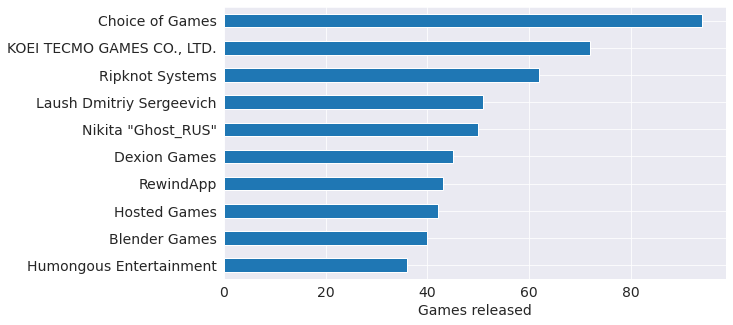

In [119]:
ax = top_developer.sort_values().plot.barh(x='developer')
ax.set_xlabel("Games released")

In [120]:
top_publisher = data_raw.publisher.value_counts().head(10)

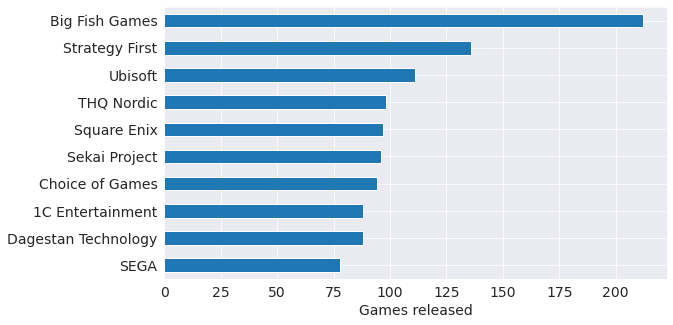

In [121]:
ax = top_publisher.sort_values().plot.barh(x='publisher')
ax.set_xlabel("Games released");

There seems to be a difference between the roles of developer and editor, if you are interested you can read this [article](https://gamingstreet.com/intro-to-the-industry-the-difference-between-game-developers-and-publishers/#:~:text=A%20game%20developer%20is%20the,a%20publisher%20to%20be%20monetized.&text=Meanwhile%2C%20a%20publisher%20is%20the,drive%20profitability%20of%20the%20product.)

#### Q4: Same developer and publisher with more than 500,000 owners.

In [122]:
samedev_publi = data_raw[((data_raw["developer"])==(data_raw["publisher"])) & (data_raw["midpoint_range_owners"]>500_000)]

In [123]:
samedev_publi = samedev_publi.publisher.value_counts().head(10)

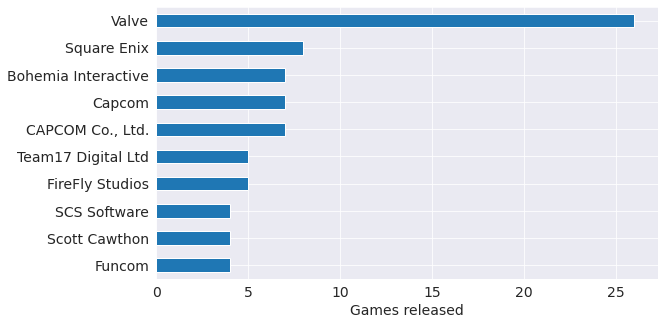

In [124]:
ax = samedev_publi.sort_values().plot.barh(x='publisher')
ax.set_xlabel("Games released");

[Valve](https://es.wikipedia.org/wiki/Valve_Corporation) is the company with more released games that sold more than 500000 copies in steam. Also looks like [capcom](https://en.wikipedia.org/wiki/Capcom) went through some name changes.

#### Q5: How games published on steam are distributed among categories, platforms and top 3 steamspy tags?

In [125]:
top_steamspy = data_raw.steamspy_tags.value_counts().head(3)
top_steamspy

Action       5579
Indie        4713
Adventure    3176
Name: steamspy_tags, dtype: int64

In [126]:
top_steamspy.sum()

13468

In [127]:
data_raw.shape[0]

27075

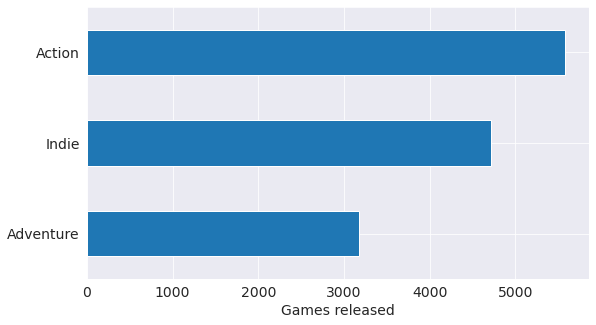

In [128]:
ax = top_steamspy.sort_values().plot.barh(x='steamspy_tags')
ax.set_xlabel("Games released");

In [129]:
top_tags = data_raw[(data_raw["steamspy_tags"] == "Action") | \
            (data_raw["steamspy_tags"] == "Indie") | \
            (data_raw["steamspy_tags"] == "Adventure")]

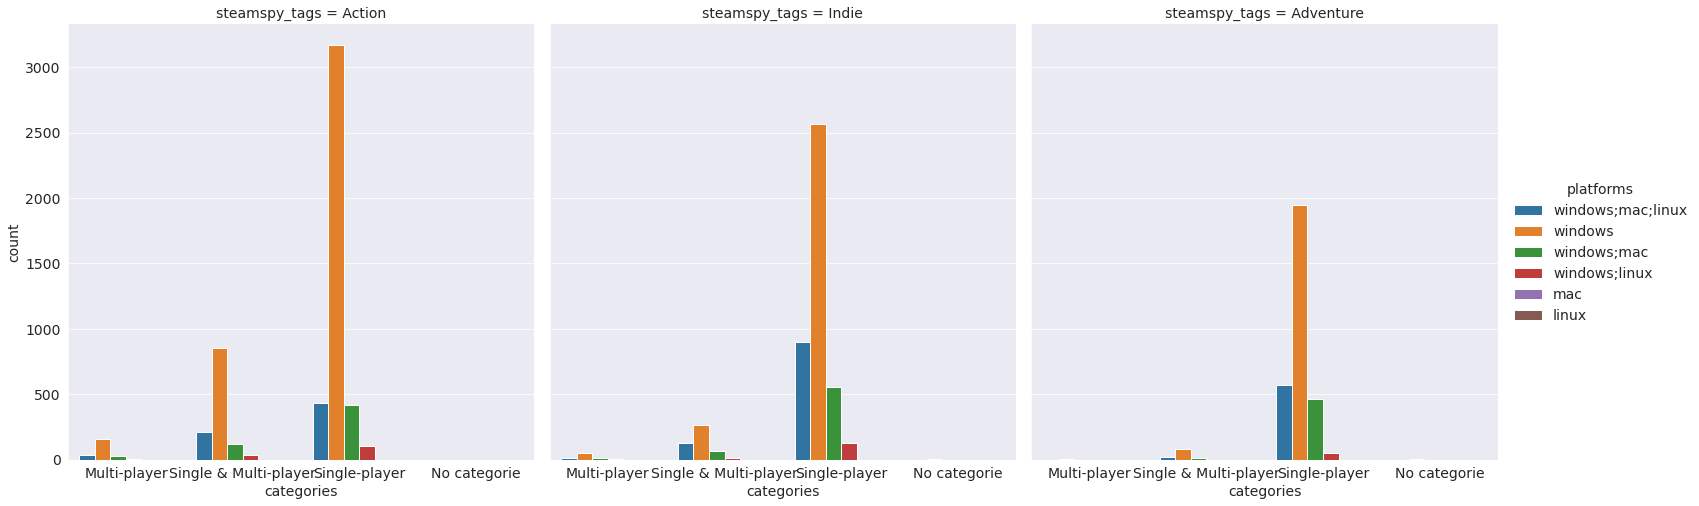

In [130]:
top_tag_figure = sns.catplot(x="categories", hue="platforms", col="steamspy_tags",
                data=top_tags, kind="count",
                height=7, aspect=1);

The top three steamspy tags are Action, Indie and Adventure, and the games, as expected, were mostly released only for the Windows platform. But an interesting fact is that, of the 27075 games, the top three steamspy tags (13468 games) account for almost 50% of the total number of games

### a bonus fact

The most expensive game in the catalog at the time the data was extracted was [ADR-Labelling Game](https://store.steampowered.com/app/821800/ADRLabelling_Game/) released in 2018, an error in the data or a professional tool?

In [131]:
data_raw[data_raw["price"]==421.99][["name","release_date"]]

,name,release_date
appid,,
821800,ADR-Labelling Game,2018-04-12


Let us save and upload our work to Jovian before continuing.

In [132]:
import jovian

In [133]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "carloscuepuente/zerotopandas-course-project-steam-catalog-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/carloscuepuente/zerotopandas-course-project-steam-catalog-analysis


'https://jovian.ai/carloscuepuente/zerotopandas-course-project-steam-catalog-analysis'

## Inferences and Conclusion

From my point of view, perhaps the biggest finding I can point out after analyzing the data, is that even though the steam catalog is full of single-player games, on average gamers spend more time playing multiplayer games. And that it appears that the rate of game releases on steam is increasing since 2014, which indicates that the video game industry is expanding. The categories with the most games are action, indie and adventure and that the games with the highest ratio of positive ratings are as varied as the type of players.

In [134]:
import jovian

In [135]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "carloscuepuente/zerotopandas-course-project-steam-catalog-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/carloscuepuente/zerotopandas-course-project-steam-catalog-analysis


'https://jovian.ai/carloscuepuente/zerotopandas-course-project-steam-catalog-analysis'

## References and Future Work

I believe that this data set still offers numerous possibilities for data exploration, especially considering that I only used a few columns. Additionally, on the [kaggle page](https://www.kaggle.com/nikdavis/steam-store-games) there are other data sets that can be used to join with this one through the unique appid for each set.

Other ideas for future projects are to implement a classification system through machine learning.

links to useful resources:

* https://stackoverflow.com/questions/50592048/get-frequency-table-from-multi-index-dates-in-pandas
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html
* https://stackoverflow.com/questions/52360977/how-to-arrrange-4-seaborn-plots-in-a-grid-python
* https://stackoverflow.com/questions/22233488/pandas-drop-a-level-from-a-multi-level-column-index
* https://realpython.com/python-data-cleaning-numpy-pandas/

## Thanks to [Jovian](https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas) for the course

In [136]:
import jovian

In [137]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "carloscuepuente/zerotopandas-course-project-steam-catalog-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/carloscuepuente/zerotopandas-course-project-steam-catalog-analysis


'https://jovian.ai/carloscuepuente/zerotopandas-course-project-steam-catalog-analysis'

In [ ]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
